In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df_prods_ords_customer = pd.read_pickle(r'C:\Users\Babafemi Olayinka\Jupyter Notebook\FEB-2023 INSTACART BASKET ANALYSIS\Data\Prepared Data\df_prods_ords_customer.pkl')

In [3]:
df_prods_ords_customer.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,spending_flag,order_freq,order_freq_flag,Gender,State,Age,date_joined,Number_Of_Dependents,Family_Status,income
0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138,28.0,6.0,11.0,...,High spender,8.0,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1977647.0,138,30.0,6.0,17.0,...,High spender,8.0,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,907.0,Premium Sliced Bacon,106.0,12.0,20.0,3160996.0,138,1.0,5.0,13.0,...,High spender,8.0,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
3,907.0,Premium Sliced Bacon,106.0,12.0,20.0,2254091.0,138,10.0,5.0,14.0,...,High spender,8.0,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000.0,Apricots,18.0,10.0,12.9,505689.0,138,9.0,6.0,12.0,...,High spender,8.0,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620


In [10]:
# checking my descriptive statistics 
df_prods_ords_customer.describe()

,product_id,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,max_price,average_price,order_freq,Age,Number_Of_Dependents,income
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.027234e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.027234e+06,2.027234e+06,2.027234e+06
mean,2.007020e+03,7.196250e+01,1.077045e+01,7.861412e+00,1.710769e+06,1.028759e+05,1.690892e+01,2.757329e+00,1.342755e+01,1.087978e+01,8.484827e+00,5.570640e-01,3.286732e+01,4.873049e+02,4.873049e+02,9.809304e+00,4.945807e+01,1.500501e+00,9.945114e+04
std,1.230503e+03,3.607379e+01,6.219882e+00,4.141013e+00,9.867332e+05,5.948320e+04,1.743966e+01,2.079445e+00,4.240659e+00,8.601596e+00,7.288041e+00,4.967332e-01,2.521676e+01,4.972688e+03,4.972688e+03,6.417957e+00,1.850769e+01,1.119221e+00,4.424904e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,1.100000e+00,1.100000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,9.900000e+02,3.700000e+01,4.000000e+00,4.300000e+00,8.566395e+05,5.130900e+04,4.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,1.490000e+01,1.490000e+01,6.000000e+00,3.300000e+01,0.000000e+00,6.650700e+04
50%,2.029000e+03,8.100000e+01,1.300000e+01,7.800000e+00,1.711186e+06,1.025510e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,2.000000e+01,2.000000e+01,7.000000e+00,4.900000e+01,2.000000e+00,9.648200e+04
75%,3.007000e+03,9.800000e+01,1.600000e+01,1.130000e+01,2.564660e+06,1.542760e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.200000e+01,1.000000e+00,4.700000e+01,2.360000e+01,2.360000e+01,1.200000e+01,6.500000e+01,3.000000e+00,1.280380e+05
max,4.138000e+03,1.340000e+02,2.100000e+01,2.450000e+01,3.421081e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.310000e+02,1.000000e+00,9.900000e+01,9.999900e+04,9.999900e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


# Creating a bar charts with the column order_dow

<AxesSubplot:>

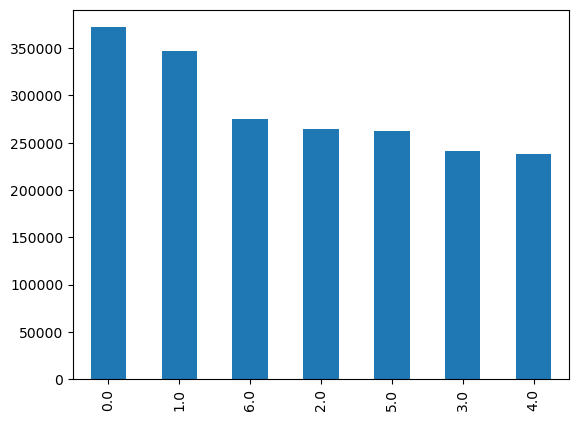

In [4]:
# creating a bar chart from number of total orders in the order_dow column, sorting it from hihgest to smallest
df_prods_ords_customer['order_dow'].value_counts().plot.bar()

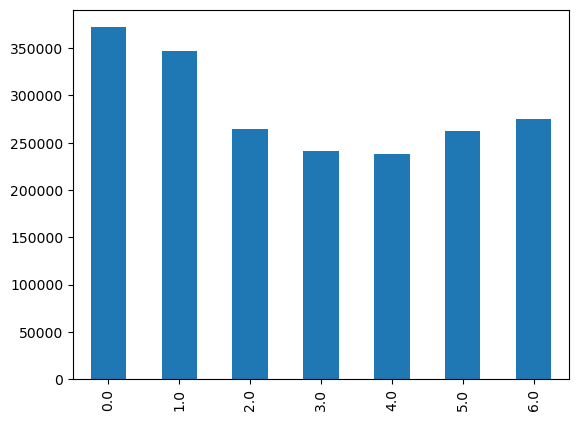

In [5]:
# creating a bar chart from number of total orders in the order_dow column, sorting it with the index axis
bar_order_dow = df_prods_ords_customer['order_dow'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

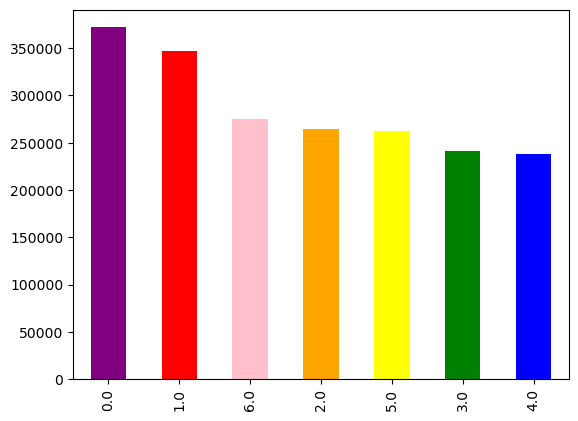

In [6]:
df_prods_ords_customer['order_dow'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# Creating a histogram

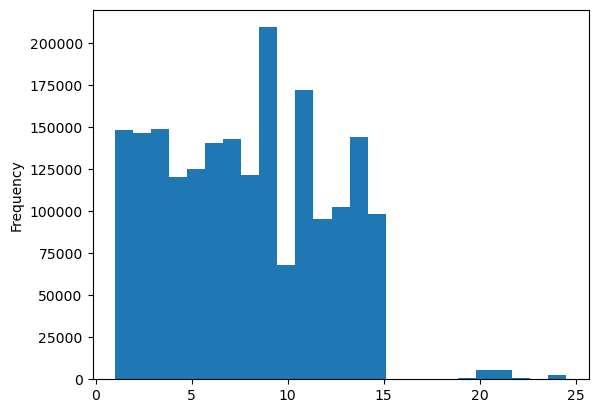

In [7]:
# plotting my histogram, making use of 25 bins
hist = df_prods_ords_customer['prices'].plot.hist(bins = 25)

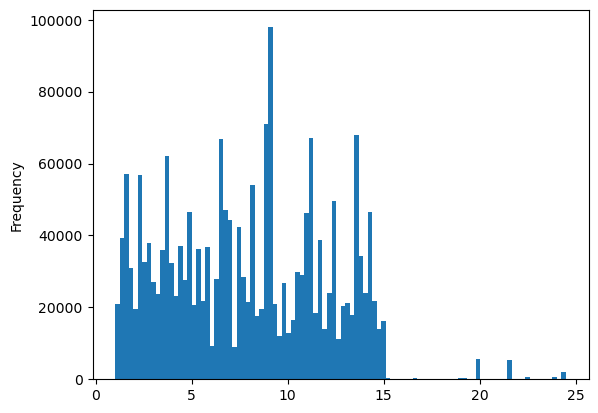

In [8]:
# plotting my histogram, making use of 100 bins
hist = df_prods_ords_customer['prices'].plot.hist(bins = 100)

# Creating scatterplot

<AxesSubplot:xlabel='prices', ylabel='prices'>

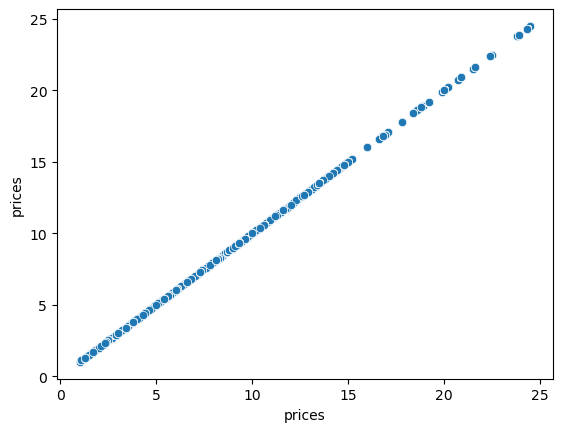

In [9]:
# plotting my scatterplot. The result show that there is no outliers and they are symmetrical , evenly distributed values within my \
price. The mean and the median is at the same point also.
sns.scatterplot(x = 'prices', y = 'prices',data = df_prods_ords_customer)

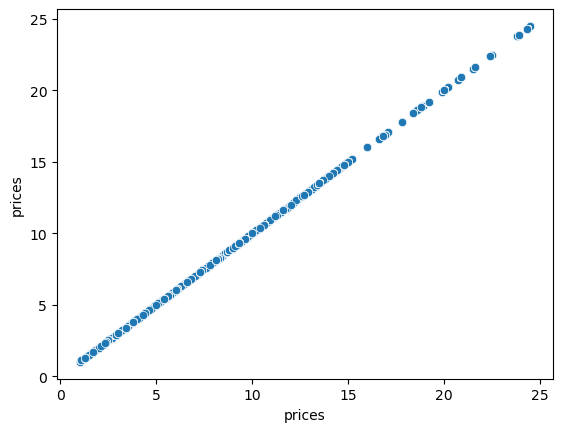

In [51]:
scatterplot_prices = sns.scatterplot(x = 'prices', y = 'prices',data = df_prods_ords_customer)

# Creating Line Chart
This df_prods_ords_customer is just the first 2 Million rows and it wont represent the total population, therefore we need to create a sample, that sample will be selected randomly from the entire dataframe (assuming the new dt_prods_ords_column) is my entire df.
 In this case, since i want a 70/30 split. Any rows whose assigned number is less than 0.7 are placed in one sample, while any rows whose assigned number is greater than 0.7 are placed in the other, effectively splitting the dataframe into two dataframes at a 70/30 ratio.

In [11]:
# This “seed” represents a random but reproducible pattern
np.random.seed(4)
dev = np.random.rand(len(df_prods_ords_customer)) <= 0.7

In [12]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
# creating a list holding True/False values to the test np.random.rand() <= 0.7 on my df_prods_ords_customer assuming that is my
entire df due to space
dev = np.random.rand(len(df_prods_ords_customer)) <= 0.7

In [17]:
# store 70% of the sample on my df_prods_ords_customer assuming that is my entire df due to space
big = df_prods_ords_customer[dev]

In [19]:
# store 30% of the sample on my df_prods_ords_customer assuming that is my entire df due to space
small = df_prods_ords_customer[~dev]

## 1) Great! Before racing immediately to create your Line chart, however, it’s always good to stop for a moment and check that you’ve achieved the results you expected.
That you have the 70% of the df as big and 30% as small
STEP 2) As one last step before creating that chart, let’s do something that will speed up the processing time even further—reducing your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.

In [20]:
# checking that the total row as expected is what i have by using fx lens.
len(df_prods_ords_customer)

2027234

In [21]:
# adding the 70% and 30% to see if they both give me 100%.
len(big) + len(small)

2027234

In [22]:
# To creates a new dataframe, df_prods_ords_customer_2, that contains only the “prices” and “order_day_of_week” columns from 
my df_prods_ords_customer.
df_prods_ords_customer_2 = small[['order_dow','prices']]

In [32]:
df_prods_ords_customer_2.head()

,order_dow,prices
2,5.0,20.0
4,6.0,12.9
12,1.0,2.9
14,0.0,4.7
22,3.0,1.7


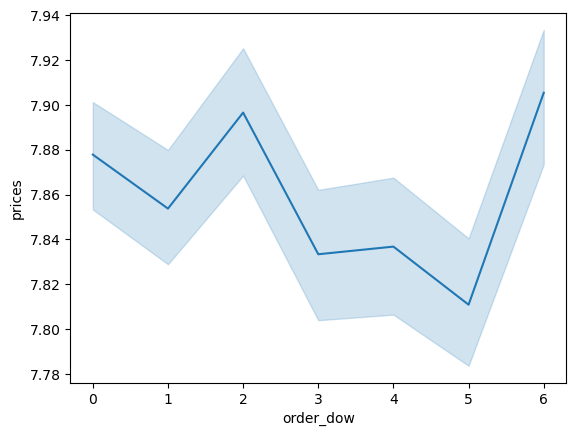

In [25]:
# Creating my line chart with the new df and using the small sample size to draw a conclusion
line_chart_week_prices = sns.lineplot(data = df_prods_ords_customer_2, x = 'order_dow',y = 'prices')

# You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column
In a markdown cell beneath your histogram, describe what the histogram demonstrates

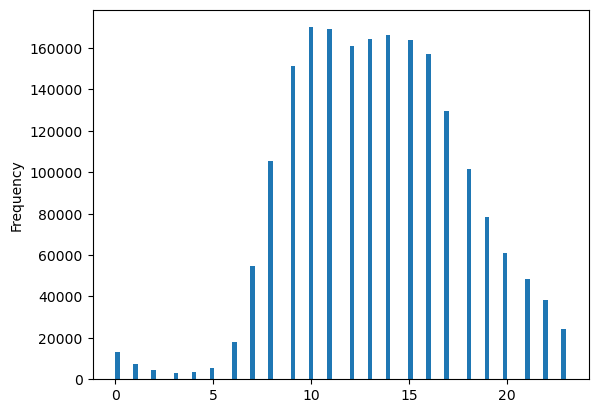

In [26]:
# histogram showing the frequency of orders values within the 0 to 24 hours in a day
hist_order_hour_of_day = df_prods_ords_customer['order_hour_of_day'].plot.hist(bins = 100)

## The histogram is showing the frequency values of orders per hour in the whole dataset
The bin represented in the x-axis is showing hour 0 to 24. The hour 10am and 11am shows the hours with the most order placed. While the hour 3am and 4am shows the hours with the least orders placed. It sounds logical, because most people are sleeping by then and maybe few people working , do placed others at work.

# The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

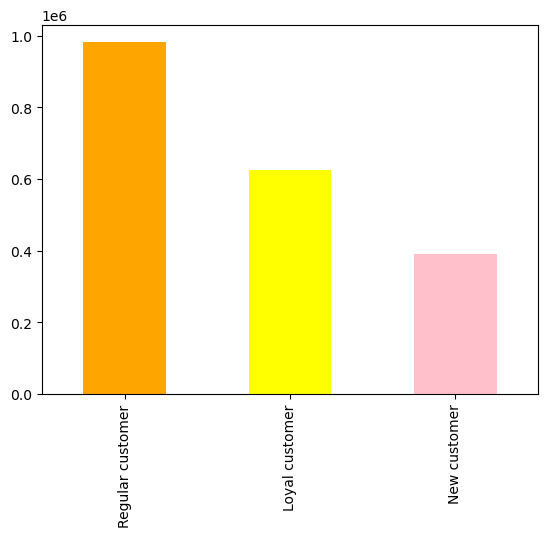

In [29]:
# bar chart showing distribution of orders among loyalty customers. It shows that regular customer frequently place orders than
than both loyal and new customers.
bar_loyalty_flag = df_prods_ords_customer['loyalty_flag'].value_counts().plot.bar(color = ['orange', 'yellow', 'pink'])

# Creating Line charts

# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)
I am creating a new line chart the will show prices of orders over time(time measured from column order_hour_of_day). Will keep to the 70/30 sample i used above. Therefore my new df will be df_order_hour_of_day_prices.

In [30]:
# To creates a new dataframe, df_order_hour_of_day_prices, that contains only the “prices” and “order_hour_of_day” columns from 
my df_prods_ords_customer.
df_order_hour_of_day_prices = small[['order_hour_of_day','prices']]

In [31]:
# verifying that my new df contains the 2 columns to run my line chart
df_order_hour_of_day_prices.head()

,order_hour_of_day,prices
2,13.0,20.0
4,12.0,12.9
12,21.0,2.9
14,21.0,4.7
22,13.0,1.7


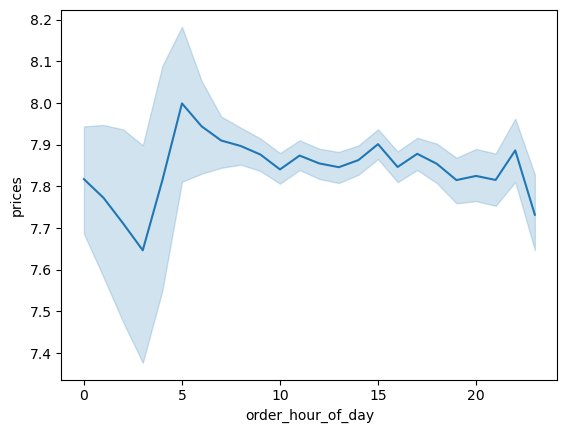

In [33]:
# Line chart showing order_hour_of_day versus the prices spent during those hours.
line_chart_order_hour_of_day_prices = sns.lineplot(data = df_order_hour_of_day_prices, x = 'order_hour_of_day',y = 'prices')

##. The line charts shows the difference in the prices spent on orders varies by time. The graph shows that Total prices of goods bought or simply say money was spent on orders at 5am and at 3am less money was spent on orders.

## Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [35]:
# To creates a new dataframe, df_Age_Dependents, that contains only the “Ages” and “Number_of_Dependents” columns from 
my df_prods_ords_customer
df_Age_Dependents = small[['Age','Number_Of_Dependents']]

In [36]:
df_Age_Dependents.head()

,Age,Number_Of_Dependents
2,81,1
4,81,1
12,66,2
14,66,2
22,40,3


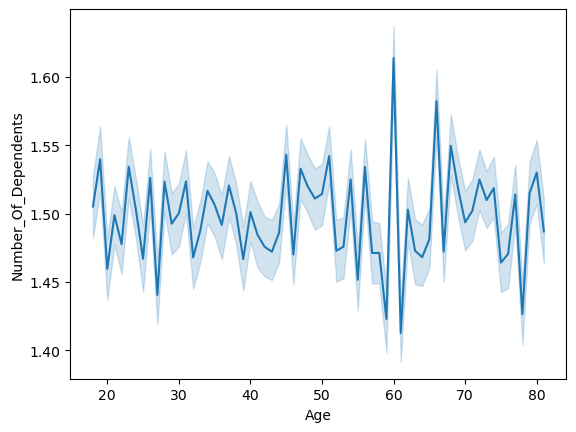

In [37]:
# Line chart showing the relationship between ages of customers and number of dependents in a family.
line_chart_Age_Dependents = sns.lineplot(data = df_Age_Dependents, x = 'Age',y = 'Number_Of_Dependents')

##. The graph is showing a wave (going up and down). I noticed the wave been constant on ages between 20 to 46. But there is a big disparity among customers ages 50 and above where the wave could go very high and very deep.

# You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function
In a markdown cell beneath your scatterplot, describe what the scatterplot shows

# Creating scatterplot

In [68]:
# To creates a new dataframe, df_Age_spending_income, that contains only the “Ages” and “income” columns from 
my df_prods_ords_customer
df_Age_spending_income = small[['Age','income']]

In [69]:
# checking to confirm if my 2 columns is in the df
df_Age_spending_income.head()

,Age,income
2,81,49620
4,81,49620
12,66,158302
14,66,158302
22,40,31308


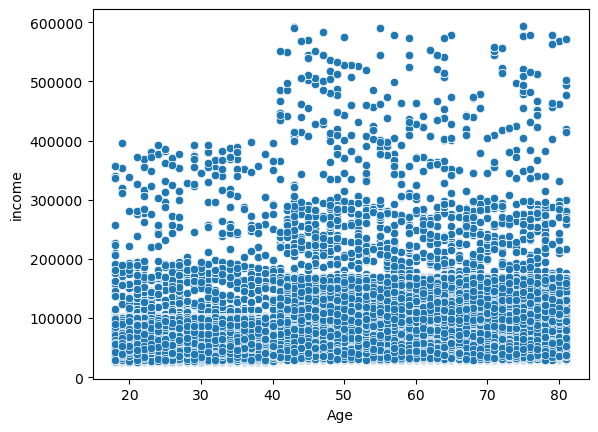

In [70]:
df_Age_spending_income = sns.scatterplot(x = 'Age', y = 'income', data = df_Age_spending_income)

##. The scatter plot is representing age as the independable variable and income as the dependable variable.  There seems to be a positive correlation between age and income. As ages increases so do income for those ages increses . Lower income values are seen from people below 40 years old and after 40, income increases considerably.

### Export my visualizations as “.png” files in your relevant project folder

In [43]:
path = r'C:\Users\Babafemi Olayinka\Jupyter Notebook\FEB-2023 INSTACART BASKET ANALYSIS'

In [44]:
path

'C:\\Users\\Babafemi Olayinka\\Jupyter Notebook\\FEB-2023 INSTACART BASKET ANALYSIS'

In [45]:
bar_order_dow.figure.savefig(os.path.join(path, 'Analysis','Visuals', 'bar_orders_dow.png'))

In [49]:
hist.figure.savefig(os.path.join(path, 'Analysis','Visuals', 'hist_prices.png'))

In [52]:
scatterplot_prices.figure.savefig(os.path.join(path, 'Analysis','Visuals', 'scatterplot_prices2.png'))

In [53]:
line_chart_week_prices.figure.savefig(os.path.join(path, 'Analysis','Visuals', 'line_chart_week_prices2.png'))

In [54]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, 'Analysis','Visuals', 'hist_order_hour_of_day2.png'))

In [55]:
bar_loyalty_flag.figure.savefig(os.path.join(path, 'Analysis','Visuals', 'bar_loyalty_flag2.png'))

In [56]:
line_chart_order_hour_of_day_prices.figure.savefig(os.path.join(path, 'Analysis','Visuals', 'line_chart_order_hour_of_day_prices2.png'))

In [57]:
line_chart_Age_Dependents.figure.savefig(os.path.join(path, 'Analysis','Visuals', 'line_chart_Age_Dependents2.png'))

In [71]:
df_Age_spending_income.figure.savefig(os.path.join(path, 'Analysis','Visuals', 'scatterplot_Age_spending_income.png'))